In [1]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [2]:
x, y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)

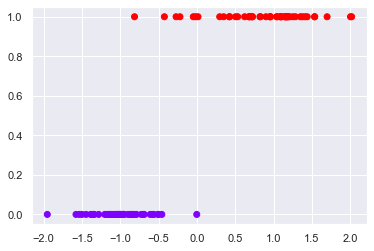

In [3]:
plt.scatter(x, y, c=y, cmap='rainbow')

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

In [5]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [6]:
print(lr.coef_)
print(lr.intercept_)

[[2.86553537]]
[0.63367671]


In [7]:
y_pred = lr.predict(x_test)

In [8]:
confusion_matrix(y_test, y_pred)

array([[13,  0],
       [ 0, 20]], dtype=int64)

In [9]:
lr.predict_proba(x_test)

array([[0.01820627, 0.98179373],
       [0.66390767, 0.33609233],
       [0.0222173 , 0.9777827 ],
       [0.01630491, 0.98369509],
       [0.84155863, 0.15844137],
       [0.01017236, 0.98982764],
       [0.08199025, 0.91800975],
       [0.03288925, 0.96711075],
       [0.13484597, 0.86515403],
       [0.88964283, 0.11035717],
       [0.83641103, 0.16358897],
       [0.16378377, 0.83621623],
       [0.91125919, 0.08874081],
       [0.02614364, 0.97385636],
       [0.95446907, 0.04553093],
       [0.03868131, 0.96131869],
       [0.93422777, 0.06577223],
       [0.03330946, 0.96669054],
       [0.01960324, 0.98039676],
       [0.97998486, 0.02001514],
       [0.96203507, 0.03796493],
       [0.01802749, 0.98197251],
       [0.90561503, 0.09438497],
       [0.01096955, 0.98903045],
       [0.00647581, 0.99352419],
       [0.0144682 , 0.9855318 ],
       [0.02341463, 0.97658537],
       [0.68951354, 0.31048646],
       [0.97506467, 0.02493533],
       [0.33815792, 0.66184208],
       [0.

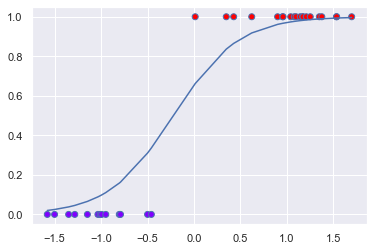

In [10]:
df = pd.DataFrame({'x': x_test[:,0], 'y': y_test})
df = df.sort_values(by='x')
from scipy.special import expit
sigmoid_function = expit(df['x'] * lr.coef_[0][0] + lr.intercept_[0]).ravel()
plt.plot(df['x'], sigmoid_function)
plt.scatter(df['x'], df['y'], c=df['y'], cmap='rainbow', edgecolors='b')

In [11]:
from sklearn.datasets import load_digits
digits = load_digits()

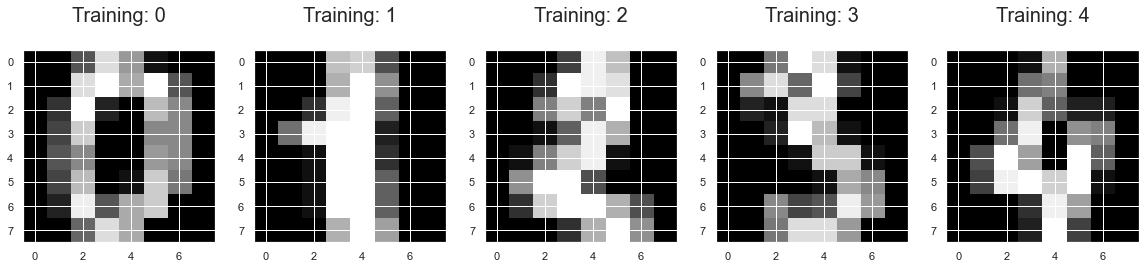

In [12]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [14]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
predictions = logisticRegr.predict(x_test)

In [16]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


In [17]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]
